In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.max_columns = None

%matplotlib inline

In [2]:
df_intakes = pd.read_csv('../data/raw_data/Austin_Animal_Center_Intakes.csv', parse_dates=True)
df_intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A748291,*Madison,05/01/2017 02:26:00 PM,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,Black
1,A750529,NaN,05/28/2017 01:22:00 PM,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,White/Cream
2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby
3,A748238,NaN,05/01/2017 10:53:00 AM,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,White
4,A683644,*Zoey,07/13/2014 11:02:00 AM,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White


In [3]:
df_intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95221 entries, 0 to 95220
Data columns (total 12 columns):
Animal ID           95221 non-null object
Name                65686 non-null object
DateTime            95221 non-null object
MonthYear           95221 non-null object
Found Location      95221 non-null object
Intake Type         95221 non-null object
Intake Condition    95221 non-null object
Animal Type         95221 non-null object
Sex upon Intake     95220 non-null object
Age upon Intake     95221 non-null object
Breed               95221 non-null object
Color               95221 non-null object
dtypes: object(12)
memory usage: 8.7+ MB


In [4]:
df_outcomes = pd.read_csv('../data/raw_data/Austin_Animal_Center_Outcomes.csv')
df_outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A771830,*Bradley,12/27/2018 01:25:00 PM,12/27/2018 01:25:00 PM,05/10/2017,Adoption,Foster,Dog,Neutered Male,1 year,Pit Bull Mix,White/Blue
1,A779576,*Rajah,10/01/2018 05:03:00 PM,10/01/2018 05:03:00 PM,04/18/2018,Adoption,NaN,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Brown Tabby
2,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico
3,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan
4,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray


In [5]:
df_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95265 entries, 0 to 95264
Data columns (total 12 columns):
Animal ID           95265 non-null object
Name                65866 non-null object
DateTime            95265 non-null object
MonthYear           95265 non-null object
Date of Birth       95265 non-null object
Outcome Type        95258 non-null object
Outcome Subtype     43226 non-null object
Animal Type         95265 non-null object
Sex upon Outcome    95263 non-null object
Age upon Outcome    95259 non-null object
Breed               95265 non-null object
Color               95265 non-null object
dtypes: object(12)
memory usage: 8.7+ MB


In [6]:
df_merged = pd.merge(left=df_intakes, right=df_outcomes, on='Animal ID', how='outer', suffixes=('_intakes', '_outcomes'))

In [7]:
df_merged.head()

,Animal ID,Name_intakes,DateTime_intakes,MonthYear_intakes,Found Location,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,Name_outcomes,DateTime_outcomes,MonthYear_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes
0,A748291,*Madison,05/01/2017 02:26:00 PM,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,Black,*Madison,09/04/2017 12:00:00 AM,09/04/2017 12:00:00 AM,06/01/2016,Transfer,Partner,Dog,Spayed Female,1 year,Pit Bull Mix,Black
1,A750529,NaN,05/28/2017 01:22:00 PM,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,White/Cream,NaN,06/01/2017 04:42:00 PM,06/01/2017 04:42:00 PM,12/21/2016,Transfer,Partner,Dog,Spayed Female,5 months,Miniature Schnauzer Mix,White/Cream
2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,NaN,07/08/2016 09:00:00 AM,07/08/2016 09:00:00 AM,12/07/2015,Transfer,SCRP,Cat,Neutered Male,7 months,Domestic Shorthair Mix,Blue Tabby
3,A748238,NaN,05/01/2017 10:53:00 AM,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,White,NaN,05/06/2017 03:57:00 PM,05/06/2017 03:57:00 PM,05/01/2014,Transfer,Partner,Dog,Neutered Male,3 years,Bichon Frise Mix,White
4,A683644,*Zoey,07/13/2014 11:02:00 AM,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White,*Zoey,11/06/2014 10:06:00 AM,11/06/2014 10:06:00 AM,06/13/2014,Adoption,Foster,Dog,Spayed Female,4 months,Border Collie Mix,Brown/White


You can see that data lines up above by looking at name_intakes and name_outcomes

In [8]:
df_merged['Outcome Type'].unique()

array(['Transfer', 'Adoption', 'Return to Owner', 'Euthanasia',
       'Rto-Adopt', nan, 'Disposal', 'Died', 'Missing', 'Relocate'],
      dtype=object)

In [9]:
df_merged['Animal Type_intakes'].unique()

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock', nan], dtype=object)

In [10]:
animal_outcomes = df_merged.groupby(['Animal Type_intakes', 'Outcome Type']).agg({'Outcome Type':'count'})
animal_outcomes.columns = ['Outcome Type by Animal']
animal_outcomes = animal_outcomes.reset_index()
animal_outcomes


,Animal Type_intakes,Outcome Type,Outcome Type by Animal
0,Bird,Adoption,173
1,Bird,Died,11
2,Bird,Disposal,24
3,Bird,Euthanasia,98
4,Bird,Missing,1
5,Bird,Relocate,9
6,Bird,Return to Owner,16
7,Bird,Transfer,117
8,Cat,Adoption,17690
9,Cat,Died,502


In [11]:
animal_outcomes_2 = animal_outcomes.groupby('Animal Type_intakes').agg('sum')
animal_outcomes_2

,Outcome Type by Animal
Animal Type_intakes,
Bird,449
Cat,38480
Dog,76818
Livestock,11
Other,5081


In [12]:
animal_outcomes = animal_outcomes.merge(animal_outcomes_2, on='Animal Type_intakes')
animal_outcomes.head()

,Animal Type_intakes,Outcome Type,Outcome Type by Animal_x,Outcome Type by Animal_y
0,Bird,Adoption,173,449
1,Bird,Died,11,449
2,Bird,Disposal,24,449
3,Bird,Euthanasia,98,449
4,Bird,Missing,1,449


In [15]:
animal_outcomes.columns = ['animal', 'outcome', 'outcome_type', 'total_animals']
animal_outcomes.head()

,animal,outcome,outcome_type,total_animals
0,Bird,Adoption,173,449
1,Bird,Died,11,449
2,Bird,Disposal,24,449
3,Bird,Euthanasia,98,449
4,Bird,Missing,1,449


In [16]:
animal_outcomes = animal_outcomes.loc[:, ['animal', 'outcome', 'outcome_type', 'total_animals']]

animal_outcomes.head()

,animal,outcome,outcome_type,total_animals
0,Bird,Adoption,173,449
1,Bird,Died,11,449
2,Bird,Disposal,24,449
3,Bird,Euthanasia,98,449
4,Bird,Missing,1,449


In [17]:
animal_outcomes['outcome_type_percent'] = animal_outcomes['outcome_type'] / animal_outcomes['total_animals']
animal_outcomes

,animal,outcome,outcome_type,total_animals,outcome_type_percent
0,Bird,Adoption,173,449,0.385301
1,Bird,Died,11,449,0.024499
2,Bird,Disposal,24,449,0.053452
3,Bird,Euthanasia,98,449,0.218263
4,Bird,Missing,1,449,0.002227
5,Bird,Relocate,9,449,0.020045
6,Bird,Return to Owner,16,449,0.035635
7,Bird,Transfer,117,449,0.260579
8,Cat,Adoption,17690,38480,0.459719
9,Cat,Died,502,38480,0.013046


In [18]:
animal_outcomes = animal_outcomes.loc[(animal_outcomes['animal'] == 'Cat') | (animal_outcomes['animal'] == 'Dog')]
animal_outcomes

,animal,outcome,outcome_type,total_animals,outcome_type_percent
8,Cat,Adoption,17690,38480,0.459719
9,Cat,Died,502,38480,0.013046
10,Cat,Disposal,14,38480,0.000364
11,Cat,Euthanasia,1642,38480,0.042672
12,Cat,Missing,35,38480,0.000910
13,Cat,Return to Owner,2094,38480,0.054418
14,Cat,Rto-Adopt,71,38480,0.001845
15,Cat,Transfer,16432,38480,0.427027
16,Dog,Adoption,35067,76818,0.456495
17,Dog,Died,187,76818,0.002434


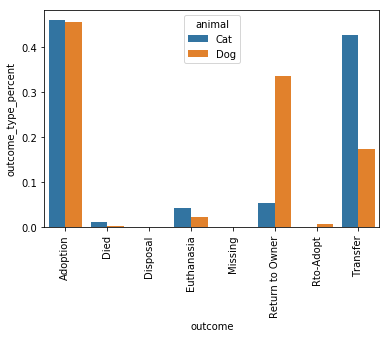

In [19]:
outcome_plot = sns.barplot(x = 'outcome', y = 'outcome_type_percent', hue='animal', data=animal_outcomes);
outcome_plot.set_xticklabels(outcome_plot.get_xticklabels(), rotation=90);


Above is the argument I can make for making this focused on cats. So many dogs are returned to owner, it makes sense to have them come in. It's less than 10% for cats, and nearly 100% of cat outcomes are for transfers and adoptions

So my next steps are - filter out all non-cats, filter out all non-transfers or non-adopted. filter out any animals that are missing either intake or outcome

by only grabbing those that are "Cat" in both intake type and outcome type, it will filter out any IDs that don't match both original datasets, thus only giving me the cats that are in both intake and outcomes.

In [20]:
df_merged = df_merged.loc[(df_merged['Animal Type_intakes'] == 'Cat') & (df_merged['Animal Type_outcomes'] == 'Cat')]

In [21]:
df_merged.describe()

,Animal ID,Name_intakes,DateTime_intakes,MonthYear_intakes,Found Location,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,Name_outcomes,DateTime_outcomes,MonthYear_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes
count,38480,22461,38480,38480,38480,38480,38480,38480,38480,38480,38480,38480,22461,38480,38480,38480,38480,22989,38480,38480,38478,38480,38480
unique,33486,8209,20441,20441,13378,4,8,1,5,45,89,256,8209,26394,26394,4556,8,17,1,5,45,89,256
top,A774102,Bella,09/23/2016 12:00:00 PM,09/23/2016 12:00:00 PM,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Brown Tabby,Bella,08/11/2015 12:00:00 AM,08/11/2015 12:00:00 AM,04/21/2014,Adoption,Partner,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Brown Tabby
freq,30,89,73,73,7345,29158,33462,38480,13140,6226,30607,5778,89,26,26,89,17690,11408,38480,12117,7489,30607,5778


Above it's confirmed, same number of outcome types as there are animals. Also note that there are around 5k duplicate IDs. These should represent animals who have been there more than once, let's dig in

In [22]:
df_merged.head()

,Animal ID,Name_intakes,DateTime_intakes,MonthYear_intakes,Found Location,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,Name_outcomes,DateTime_outcomes,MonthYear_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes
2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,NaN,07/08/2016 09:00:00 AM,07/08/2016 09:00:00 AM,12/07/2015,Transfer,SCRP,Cat,Neutered Male,7 months,Domestic Shorthair Mix,Blue Tabby
10,A679549,*Gilbert,05/22/2014 03:43:00 PM,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,*Gilbert,06/16/2014 01:54:00 PM,06/16/2014 01:54:00 PM,03/31/2014,Transfer,Partner,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black/White
11,A683798,Mustachala,07/21/2016 12:16:00 PM,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,Mustachala,10/18/2016 10:55:00 AM,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black
12,A683798,Mustachala,07/21/2016 12:16:00 PM,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,Mustachala,07/23/2014 06:06:00 PM,07/23/2014 06:06:00 PM,01/15/2013,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Medium Hair Mix,White/Black
13,A683798,Mustachala,07/15/2014 03:38:00 PM,07/15/2014 03:38:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,Mustachala,10/18/2016 10:55:00 AM,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black


In [23]:
import pickle
with open('/Users/robertpagano/src/metis_project_mcnulty/data/interim_data/merged_data_cats_all_columns.pickle', 'wb') as to_write:
    pickle.dump(df_merged, to_write)

below doing some removal of columns not needed. I'll first save it above in a pickle in case I need any columns later

In [24]:
df_merged.columns

Index(['Animal ID', 'Name_intakes', 'DateTime_intakes', 'MonthYear_intakes',
       'Found Location', 'Intake Type', 'Intake Condition',
       'Animal Type_intakes', 'Sex upon Intake', 'Age upon Intake',
       'Breed_intakes', 'Color_intakes', 'Name_outcomes', 'DateTime_outcomes',
       'MonthYear_outcomes', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Animal Type_outcomes', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed_outcomes', 'Color_outcomes'],
      dtype='object')

In [25]:
df_merged = df_merged.loc[: ,['Animal ID', 'DateTime_intakes', 'Intake Type', 'Intake Condition',
       'Animal Type_intakes', 'Sex upon Intake', 'Age upon Intake',
       'Breed_intakes', 'Color_intakes', 'DateTime_outcomes', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Sex upon Outcome',
       'Age upon Outcome']]

In [26]:
df_merged.head()

,Animal ID,DateTime_intakes,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,DateTime_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
2,A730601,07/07/2016 12:11:00 PM,Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,07/08/2016 09:00:00 AM,12/07/2015,Transfer,SCRP,Neutered Male,7 months
10,A679549,05/22/2014 03:43:00 PM,Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,06/16/2014 01:54:00 PM,03/31/2014,Transfer,Partner,Neutered Male,2 months
11,A683798,07/21/2016 12:16:00 PM,Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Spayed Female,3 years
12,A683798,07/21/2016 12:16:00 PM,Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,07/23/2014 06:06:00 PM,01/15/2013,Adoption,NaN,Spayed Female,1 year
13,A683798,07/15/2014 03:38:00 PM,Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Spayed Female,3 years


In [27]:
df_merged['intake_count'] = df_merged.groupby('Animal ID').agg('count')

ValueError: Wrong number of items passed 14, placement implies 1

In [ ]:
df_merged.head(200)

In [28]:
df_merged['intake_count'].unique()

KeyError: 'intake_count'

I thikn we can only look at animals that have just 1 intake and just 1 outcome - if I think of a different way to do this I will, but I don't think so. If so, I'll take the old pickle and start over

In [29]:
df_merged.groupby('Animal ID').agg('count')

,DateTime_intakes,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,DateTime_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
Animal ID,,,,,,,,,,,,,,
A191351,1,1,1,1,1,1,1,1,1,1,1,0,1,1
A197810,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A214991,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A221174,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A234161,1,1,1,1,1,1,1,1,1,1,1,0,1,1
A243903,1,1,1,1,1,1,1,1,1,1,1,0,1,1
A251268,1,1,1,1,1,1,1,1,1,1,1,0,1,1
A258441,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A260631,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [31]:
df_merged['unique_intakes'] = df_merged.groupby('Animal ID')['Animal ID'].transform('size')

In [32]:
df_merged.head(50)

,Animal ID,DateTime_intakes,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,DateTime_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,unique_intakes
2,A730601,07/07/2016 12:11:00 PM,Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,07/08/2016 09:00:00 AM,12/07/2015,Transfer,SCRP,Neutered Male,7 months,1
10,A679549,05/22/2014 03:43:00 PM,Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,06/16/2014 01:54:00 PM,03/31/2014,Transfer,Partner,Neutered Male,2 months,1
11,A683798,07/21/2016 12:16:00 PM,Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Spayed Female,3 years,4
12,A683798,07/21/2016 12:16:00 PM,Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,07/23/2014 06:06:00 PM,01/15/2013,Adoption,NaN,Spayed Female,1 year,4
13,A683798,07/15/2014 03:38:00 PM,Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Spayed Female,3 years,4
14,A683798,07/15/2014 03:38:00 PM,Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,07/23/2014 06:06:00 PM,01/15/2013,Adoption,NaN,Spayed Female,1 year,4
40,A683656,07/13/2014 01:20:00 PM,Stray,Normal,Cat,Intact Male,2 months,Snowshoe Mix,Lynx Point,07/17/2014 04:57:00 PM,04/13/2014,Adoption,NaN,Neutered Male,3 months,1
41,A709749,08/12/2015 06:29:00 PM,Stray,Normal,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico,09/22/2015 12:49:00 PM,08/12/2014,Transfer,Partner,Spayed Female,1 year,1
52,A733551,08/23/2016 02:35:00 PM,Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,09/01/2016 12:00:00 AM,06/23/2016,Transfer,Partner,Intact Male,2 months,1
54,A732960,08/15/2016 03:08:00 PM,Stray,Normal,Cat,Intact Female,2 months,Domestic Shorthair Mix,Calico,08/19/2016 06:27:00 PM,06/14/2016,Adoption,NaN,Spayed Female,2 months,1


OK so now I'll filter out any intakes > 1 - there's no way to track which intakes align with which outcomes unfortunatley. On top of that, a person wouldn't know that information making a decision to bring them in, so wouldn't be a valid feature anyway

In [33]:
df_merged = df_merged.loc[(df_merged['unique_intakes'] == 1)]
df_merged.sample(100)

,Animal ID,DateTime_intakes,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,DateTime_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,unique_intakes
55449,A708432,07/27/2015 05:20:00 PM,Stray,Normal,Cat,Intact Female,2 days,Domestic Shorthair Mix,Black,09/21/2015 03:54:00 PM,07/25/2015,Transfer,Partner,Intact Female,1 month,1
71557,A774298,06/13/2018 12:37:00 PM,Owner Surrender,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Torbie/White,07/29/2018 02:16:00 PM,04/13/2018,Adoption,NaN,Spayed Female,3 months,1
97308,A716962,11/29/2015 03:27:00 PM,Stray,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,White/Brown Tabby,02/07/2016 06:48:00 PM,09/29/2015,Adoption,NaN,Spayed Female,4 months,1
70814,A763578,12/11/2017 12:35:00 PM,Owner Surrender,Normal,Cat,Intact Female,2 months,Domestic Shorthair Mix,Tortie,12/13/2017 12:37:00 PM,09/26/2017,Adoption,NaN,Spayed Female,2 months,1
8836,A782088,10/10/2018 02:10:00 PM,Owner Surrender,Normal,Cat,Intact Female,6 months,Domestic Shorthair Mix,Black,10/16/2018 06:07:00 PM,04/10/2018,Adoption,NaN,Spayed Female,6 months,1
94905,A736662,10/14/2016 06:42:00 PM,Stray,Injured,Cat,Intact Female,2 years,Siamese Mix,Seal Point,10/29/2016 06:10:00 PM,10/14/2014,Adoption,NaN,Spayed Female,2 years,1
85023,A750270,05/25/2017 09:06:00 AM,Owner Surrender,Normal,Cat,Neutered Male,2 years,Domestic Medium Hair Mix,Black/White,06/19/2017 02:52:00 PM,06/22/2014,Adoption,NaN,Neutered Male,2 years,1
69373,A670999,01/17/2014 11:10:00 AM,Stray,Normal,Cat,Unknown,3 months,Domestic Shorthair Mix,Brown Tabby/White,01/19/2014 05:34:00 PM,10/17/2013,Transfer,SCRP,Unknown,3 months,1
49156,A489405,06/08/2018 12:27:00 PM,Owner Surrender,Normal,Cat,Neutered Male,13 years,Domestic Longhair Mix,Orange Tabby/White,08/11/2018 04:25:00 PM,10/12/2004,Adoption,NaN,Neutered Male,13 years,1
96409,A686144,08/17/2014 12:22:00 PM,Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,08/24/2014 02:23:00 PM,07/10/2014,Transfer,Partner,Intact Male,1 month,1


In [34]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32054 entries, 2 to 121562
Data columns (total 16 columns):
Animal ID              32054 non-null object
DateTime_intakes       32054 non-null object
Intake Type            32054 non-null object
Intake Condition       32054 non-null object
Animal Type_intakes    32054 non-null object
Sex upon Intake        32054 non-null object
Age upon Intake        32054 non-null object
Breed_intakes          32054 non-null object
Color_intakes          32054 non-null object
DateTime_outcomes      32054 non-null object
Date of Birth          32054 non-null object
Outcome Type           32054 non-null object
Outcome Subtype        20849 non-null object
Sex upon Outcome       32054 non-null object
Age upon Outcome       32052 non-null object
unique_intakes         32054 non-null int64
dtypes: int64(1), object(15)
memory usage: 4.2+ MB


In [35]:
df_merged = df_merged.loc[: ,['Animal ID', 'DateTime_intakes', 'Intake Type', 'Intake Condition',
       'Sex upon Intake', 'Age upon Intake',
       'Breed_intakes', 'Color_intakes', 'DateTime_outcomes', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Sex upon Outcome']]

In [36]:
df_merged.head()

,Animal ID,DateTime_intakes,Intake Type,Intake Condition,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,DateTime_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome
2,A730601,07/07/2016 12:11:00 PM,Stray,Normal,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,07/08/2016 09:00:00 AM,12/07/2015,Transfer,SCRP,Neutered Male
10,A679549,05/22/2014 03:43:00 PM,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black/White,06/16/2014 01:54:00 PM,03/31/2014,Transfer,Partner,Neutered Male
40,A683656,07/13/2014 01:20:00 PM,Stray,Normal,Intact Male,2 months,Snowshoe Mix,Lynx Point,07/17/2014 04:57:00 PM,04/13/2014,Adoption,NaN,Neutered Male
41,A709749,08/12/2015 06:29:00 PM,Stray,Normal,Intact Female,1 year,Domestic Shorthair Mix,Calico,09/22/2015 12:49:00 PM,08/12/2014,Transfer,Partner,Spayed Female
52,A733551,08/23/2016 02:35:00 PM,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,09/01/2016 12:00:00 AM,06/23/2016,Transfer,Partner,Intact Male


In [37]:
df_merged = df_merged.rename(columns={'Animal ID': 'animal_id', 
                         'DateTime_intakes': 'date_intake', 
                         'Intake Type': 'intake_type', 
                         'Intake Condition': 'intake_condition', 
                         'Sex upon Intake': 'sex_fixed_intake', 
                         'Age upon Intake': 'age_raw', 
                         'Breed_intakes': 'breed', 
                         'Color_intakes': 'color', 
                         'DateTime_outcomes': 'date_outcome', 
                         'Date of Birth': 'dob', 
                         'Outcome Type': 'outcome_type', 
                         'Outcome Subtype': 'outcome_subtype', 
                         'Sex upon Outcome': 'sex_fixed_outcome'})

In [38]:
df_merged.head()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome
2,A730601,07/07/2016 12:11:00 PM,Stray,Normal,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,07/08/2016 09:00:00 AM,12/07/2015,Transfer,SCRP,Neutered Male
10,A679549,05/22/2014 03:43:00 PM,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black/White,06/16/2014 01:54:00 PM,03/31/2014,Transfer,Partner,Neutered Male
40,A683656,07/13/2014 01:20:00 PM,Stray,Normal,Intact Male,2 months,Snowshoe Mix,Lynx Point,07/17/2014 04:57:00 PM,04/13/2014,Adoption,NaN,Neutered Male
41,A709749,08/12/2015 06:29:00 PM,Stray,Normal,Intact Female,1 year,Domestic Shorthair Mix,Calico,09/22/2015 12:49:00 PM,08/12/2014,Transfer,Partner,Spayed Female
52,A733551,08/23/2016 02:35:00 PM,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,09/01/2016 12:00:00 AM,06/23/2016,Transfer,Partner,Intact Male


In [39]:
df_merged['intake_type'].unique()

array(['Stray', 'Owner Surrender', 'Public Assist', 'Euthanasia Request'],
      dtype=object)

In [40]:
df_merged['intake_condition'].unique()

array(['Normal', 'Nursing', 'Sick', 'Injured', 'Feral', 'Aged', 'Other',
       'Pregnant'], dtype=object)

In [41]:
df_merged['sex_fixed_intake'].unique()

array(['Intact Male', 'Intact Female', 'Spayed Female', 'Neutered Male',
       'Unknown'], dtype=object)

In [42]:
df_merged['sex_fixed_outcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown'], dtype=object)

In [43]:
df_merged['breed'].unique()

array(['Domestic Shorthair Mix', 'Snowshoe Mix', 'Siamese Mix',
       'Domestic Longhair Mix', 'Domestic Shorthair',
       'Domestic Medium Hair Mix', 'Domestic Medium Hair',
       'Maine Coon Mix', 'Maine Coon', 'American Shorthair Mix',
       'Tonkinese Mix', 'Bombay Mix', 'Manx Mix', 'Turkish Van Mix',
       'Russian Blue Mix', 'Siamese/Domestic Shorthair', 'Siamese',
       'Turkish Angora Mix', 'Persian', 'Balinese Mix',
       'Munchkin Shorthair Mix', 'Snowshoe/Siamese', 'Himalayan Mix',
       'Angora Mix', 'Colorpoint Mix', 'Persian Mix',
       'Japanese Bobtail Mix', 'Scottish Fold/Domestic Shorthair',
       'Domestic Longhair', 'American Curl Shorthair',
       'Siamese/Japanese Bobtail', 'American Curl Shorthair Mix',
       'Exotic Shorthair Mix', 'Domestic Medium Hair/Siamese',
       'Bengal Mix', 'Domestic Shorthair/British Shorthair',
       'Javanese Mix', 'American Curl Shorthair/Siamese',
       'Domestic Shorthair/American Shorthair', 'British Shorthair',
  

In [44]:
df_merged['outcome_type'].unique()

array(['Transfer', 'Adoption', 'Euthanasia', 'Return to Owner',
       'Rto-Adopt', 'Died', 'Disposal', 'Missing'], dtype=object)

In [45]:
df_merged['outcome_subtype'].unique()

array(['SCRP', 'Partner', nan, 'Suffering', 'Foster', 'Offsite', 'Snr',
       'Medical', 'In Kennel', 'In Surgery', 'Rabies Risk', 'In Foster',
       'At Vet', 'Enroute', 'Possible Theft', 'Aggressive', 'Barn',
       'Underage'], dtype=object)

Now that I have all of the unique values, I'll start with some editing.

First, separating out sex and intactness using binomial variable:

In [46]:
df_merged['is_male'] = np.where(df_merged['sex_fixed_intake'].str.contains('Male'), 1, 0)
df_merged['is_fixed'] = np.where(df_merged['sex_fixed_intake'].str.contains('Intact'), 0, 1)

In [47]:
df_merged.head(10)

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed
2,A730601,07/07/2016 12:11:00 PM,Stray,Normal,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,07/08/2016 09:00:00 AM,12/07/2015,Transfer,SCRP,Neutered Male,1,0
10,A679549,05/22/2014 03:43:00 PM,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black/White,06/16/2014 01:54:00 PM,03/31/2014,Transfer,Partner,Neutered Male,1,0
40,A683656,07/13/2014 01:20:00 PM,Stray,Normal,Intact Male,2 months,Snowshoe Mix,Lynx Point,07/17/2014 04:57:00 PM,04/13/2014,Adoption,NaN,Neutered Male,1,0
41,A709749,08/12/2015 06:29:00 PM,Stray,Normal,Intact Female,1 year,Domestic Shorthair Mix,Calico,09/22/2015 12:49:00 PM,08/12/2014,Transfer,Partner,Spayed Female,0,0
52,A733551,08/23/2016 02:35:00 PM,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,09/01/2016 12:00:00 AM,06/23/2016,Transfer,Partner,Intact Male,1,0
54,A732960,08/15/2016 03:08:00 PM,Stray,Normal,Intact Female,2 months,Domestic Shorthair Mix,Calico,08/19/2016 06:27:00 PM,06/14/2016,Adoption,NaN,Spayed Female,0,0
56,A756485,08/20/2017 03:07:00 PM,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Blue Tabby,08/24/2017 05:34:00 PM,06/20/2017,Adoption,NaN,Spayed Female,0,0
58,A671219,01/21/2014 11:19:00 AM,Stray,Normal,Intact Male,1 year,Siamese Mix,Flame Point,01/21/2014 03:13:00 PM,01/21/2013,Transfer,SCRP,Intact Male,1,0
62,A664571,10/05/2013 01:43:00 PM,Owner Surrender,Normal,Spayed Female,2 years,Domestic Shorthair Mix,Torbie,10/10/2013 02:07:00 PM,10/05/2011,Adoption,NaN,Spayed Female,0,1
63,A727402,05/21/2016 04:30:00 PM,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby,06/14/2016 04:18:00 PM,04/09/2016,Adoption,NaN,Intact Male,1,0


In [48]:
# converting date of birth to datetime, pulling out year and month
df_merged['dob'] = pd.to_datetime(df_merged['dob'])
df_merged['dob_year'] = df_merged['dob'].dt.year
df_merged['dob_month'] = df_merged['dob'].dt.month




In [49]:
#converting intake date and outcome date to datetime, and then creating columns for year, month, and day of week. Will use this information to determine how long each stay was with the facility

df_merged['date_intake'] = pd.to_datetime(df_merged['date_intake'])
df_merged['intake_year'] = df_merged['date_intake'].dt.year
df_merged['intake_month'] = df_merged['date_intake'].dt.month
df_merged['intake_day_of_week'] = df_merged['date_intake'].dt.dayofweek
df_merged['intake_time_of_day'] = df_merged['date_intake'].dt.time

df_merged['date_outcome'] = pd.to_datetime(df_merged['date_outcome'])
df_merged['outcome_year'] = df_merged['date_outcome'].dt.year
df_merged['outcome_month'] = df_merged['date_outcome'].dt.month
df_merged['outcome_day_of_week'] = df_merged['date_outcome'].dt.dayofweek
df_merged['outcome_time_of_day'] = df_merged['date_outcome'].dt.time




In [50]:
df_merged.head()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day
2,A730601,2016-07-07 12:11:00,Stray,Normal,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,2016-07-08 09:00:00,2015-12-07,Transfer,SCRP,Neutered Male,1,0,2015,12,2016,7,3,12:11:00,2016,7,4,09:00:00
10,A679549,2014-05-22 15:43:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black/White,2014-06-16 13:54:00,2014-03-31,Transfer,Partner,Neutered Male,1,0,2014,3,2014,5,3,15:43:00,2014,6,0,13:54:00
40,A683656,2014-07-13 13:20:00,Stray,Normal,Intact Male,2 months,Snowshoe Mix,Lynx Point,2014-07-17 16:57:00,2014-04-13,Adoption,NaN,Neutered Male,1,0,2014,4,2014,7,6,13:20:00,2014,7,3,16:57:00
41,A709749,2015-08-12 18:29:00,Stray,Normal,Intact Female,1 year,Domestic Shorthair Mix,Calico,2015-09-22 12:49:00,2014-08-12,Transfer,Partner,Spayed Female,0,0,2014,8,2015,8,2,18:29:00,2015,9,1,12:49:00
52,A733551,2016-08-23 14:35:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,2016-09-01 00:00:00,2016-06-23,Transfer,Partner,Intact Male,1,0,2016,6,2016,8,1,14:35:00,2016,9,3,00:00:00


In [51]:
df_merged.sort_values(by=['date_intake'], inplace=True, ascending=True)
df_merged.head()


,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day
110062,A664235,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:39:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:39:00
76631,A664237,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00
66872,A664236,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00
96315,A664238,2013-10-01 09:33:00,Stray,Normal,Unknown,4 months,American Shorthair Mix,Black/White,2013-10-01 16:47:00,2013-06-01,Euthanasia,Medical,Unknown,0,1,2013,6,2013,10,1,09:33:00,2013,10,1,16:47:00
117960,A664256,2013-10-01 10:59:00,Owner Surrender,Normal,Neutered Male,17 years,Domestic Shorthair Mix,Brown Tabby/White,2013-10-10 13:17:00,1996-10-01,Transfer,Partner,Neutered Male,1,1,1996,10,2013,10,1,10:59:00,2013,10,3,13:17:00


In [52]:
df_merged['date_only_intake'] = df_merged['date_intake'].dt.date

df_merged['date_only_outcome'] = df_merged['date_outcome'].dt.date


In [53]:
df_merged.tail()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome
121526,A788372,2019-02-01 13:13:00,Stray,Normal,Intact Male,2 years,Domestic Shorthair Mix,Black/White,2019-02-05 16:24:00,2017-02-01,Adoption,NaN,Neutered Male,1,0,2017,2,2019,2,4,13:13:00,2019,2,1,16:24:00,2019-02-01,2019-02-05
121210,A788384,2019-02-01 14:14:00,Stray,Sick,Unknown,8 years,Domestic Shorthair Mix,Brown Tabby/White,2019-02-01 15:38:00,2011-02-01,Euthanasia,Suffering,Unknown,0,1,2011,2,2019,2,4,14:14:00,2019,2,4,15:38:00,2019-02-01,2019-02-01
121219,A788404,2019-02-01 17:57:00,Stray,Normal,Intact Female,5 months,Domestic Shorthair Mix,Brown Tabby/White,2019-02-05 17:32:00,2018-09-01,Adoption,NaN,Spayed Female,0,0,2018,9,2019,2,4,17:57:00,2019,2,1,17:32:00,2019-02-01,2019-02-05
121340,A788473,2019-02-03 11:44:00,Stray,Injured,Intact Male,3 years,Domestic Longhair,Brown Tabby/Black,2019-02-03 12:12:00,2016-02-03,Euthanasia,Suffering,Intact Male,1,0,2016,2,2019,2,6,11:44:00,2019,2,6,12:12:00,2019-02-03,2019-02-03
121395,A788522,2019-02-04 09:48:00,Stray,Injured,Intact Female,2 months,Domestic Shorthair Mix,Blue,2019-02-04 10:16:00,2018-11-19,Euthanasia,Suffering,Intact Female,0,0,2018,11,2019,2,0,09:48:00,2019,2,0,10:16:00,2019-02-04,2019-02-04


Now I want to create a variable for # of intakes in last week, and last month. reference code from cumalative sums in baseball reference scraper, maybe I can utilize that, but will be tricky because it's not just number of rows, it's number of days

After that, here is what I need to do before moving on to modelling:
 - weather
 - length of stay
 
 
Things to come back to if time after modelling / presentation:
 - Number of times animal has been in facility in total 

In [54]:
df_merged.tail(5)

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome
121526,A788372,2019-02-01 13:13:00,Stray,Normal,Intact Male,2 years,Domestic Shorthair Mix,Black/White,2019-02-05 16:24:00,2017-02-01,Adoption,NaN,Neutered Male,1,0,2017,2,2019,2,4,13:13:00,2019,2,1,16:24:00,2019-02-01,2019-02-05
121210,A788384,2019-02-01 14:14:00,Stray,Sick,Unknown,8 years,Domestic Shorthair Mix,Brown Tabby/White,2019-02-01 15:38:00,2011-02-01,Euthanasia,Suffering,Unknown,0,1,2011,2,2019,2,4,14:14:00,2019,2,4,15:38:00,2019-02-01,2019-02-01
121219,A788404,2019-02-01 17:57:00,Stray,Normal,Intact Female,5 months,Domestic Shorthair Mix,Brown Tabby/White,2019-02-05 17:32:00,2018-09-01,Adoption,NaN,Spayed Female,0,0,2018,9,2019,2,4,17:57:00,2019,2,1,17:32:00,2019-02-01,2019-02-05
121340,A788473,2019-02-03 11:44:00,Stray,Injured,Intact Male,3 years,Domestic Longhair,Brown Tabby/Black,2019-02-03 12:12:00,2016-02-03,Euthanasia,Suffering,Intact Male,1,0,2016,2,2019,2,6,11:44:00,2019,2,6,12:12:00,2019-02-03,2019-02-03
121395,A788522,2019-02-04 09:48:00,Stray,Injured,Intact Female,2 months,Domestic Shorthair Mix,Blue,2019-02-04 10:16:00,2018-11-19,Euthanasia,Suffering,Intact Female,0,0,2018,11,2019,2,0,09:48:00,2019,2,0,10:16:00,2019-02-04,2019-02-04


In [55]:
df_temp = pd.read_csv('../data/raw_data/Austin-temp.csv', parse_dates=True)

In [56]:
df_temp.head()

,"Raw Weather Data for Austin, TX",Unnamed: 1,Unnamed: 2
0,NaN,Average Daily Temperature,NaN
1,Date,(degrees),Station Used
2,10/1/13,75.4,AUSTIN-BERGSTROM INT
3,10/2/13,80.5,AUSTIN-BERGSTROM INT
4,10/3/13,81.4,AUSTIN-BERGSTROM INT


In [57]:
df_precip = pd.read_csv('../data/raw_data/Austin-prcp.csv', parse_dates=True)


In [58]:
df_precip.head()

,"Raw Weather Data for Austin, TX",Unnamed: 1,Unnamed: 2
0,NaN,Total Daily Precipitation,NaN
1,Date,(inches),Station Used
2,10/1/13,0,AUSTIN-BERGSTROM INT
3,10/2/13,0,AUSTIN-BERGSTROM INT
4,10/3/13,0,AUSTIN-BERGSTROM INT


In [59]:
df_temp = df_temp.rename(columns={'Raw Weather Data for Austin, TX': 'date', 'Unnamed: 1': 'avg_temp', 'Unnamed: 2': 'station'})

df_precip = df_precip.rename(columns={'Raw Weather Data for Austin, TX': 'date', 'Unnamed: 1': 'total_precip', 'Unnamed: 2': 'station'})

In [60]:
df_temp.drop(df_temp.head(2).index, inplace=True)
df_precip.drop(df_precip.head(2).index, inplace=True)

In [61]:
df_precip.head()

,date,total_precip,station
2,10/1/13,0,AUSTIN-BERGSTROM INT
3,10/2/13,0,AUSTIN-BERGSTROM INT
4,10/3/13,0,AUSTIN-BERGSTROM INT
5,10/4/13,0,AUSTIN-BERGSTROM INT
6,10/5/13,0,AUSTIN-BERGSTROM INT


In [62]:
df_temp.tail(15)

,date,avg_temp,station
1942,1/23/19,48.6,AUSTIN-BERGSTROM INT
1943,1/24/19,42.3,AUSTIN-BERGSTROM INT
1944,1/25/19,47,AUSTIN-BERGSTROM INT
1945,1/26/19,51.6,AUSTIN-BERGSTROM INT
1946,1/27/19,55.7,AUSTIN-BERGSTROM INT
1947,1/28/19,52.4,AUSTIN-BERGSTROM INT
1948,1/29/19,47.7,AUSTIN-BERGSTROM INT
1949,1/30/19,45.2,AUSTIN-BERGSTROM INT
1950,1/31/19,51.6,AUSTIN-BERGSTROM INT
1951,2/1/19,60.1,AUSTIN-BERGSTROM INT


In [63]:
df_temp['date'] = pd.to_datetime(df_temp['date'])
df_precip['date'] = pd.to_datetime(df_precip['date'])

In [64]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 2 to 1956
Data columns (total 3 columns):
date        1955 non-null datetime64[ns]
avg_temp    1955 non-null object
station     1955 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 61.1+ KB


In [65]:
df_weather = pd.merge(df_temp, df_precip)

In [66]:
df_weather.tail()

,date,avg_temp,station,total_precip
1950,2019-02-02,62.3,AUSTIN-BERGSTROM INT,0.01
1951,2019-02-03,65.9,AUSTIN-BERGSTROM INT,0.02
1952,2019-02-04,69.4,AUSTIN-BERGSTROM INT,0
1953,2019-02-05,70.8,AUSTIN-BERGSTROM INT,0
1954,2019-02-06,70.5,AUSTIN-BERGSTROM INT,0


In [67]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 1954
Data columns (total 4 columns):
date            1955 non-null datetime64[ns]
avg_temp        1955 non-null object
station         1955 non-null object
total_precip    1955 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 76.4+ KB


Now I have weather by date - I'll append it to the merged data file now for both intake and outcome date

In [68]:
df_weather['date'] = df_weather['date'].dt.date


Here I am creating a dictionary of temps and precip by date so that I can easily apply it to my main merged DF

In [69]:
temp_dict = dict(zip(df_weather.date, df_weather.avg_temp))
precip_dict = dict(zip(df_weather.date, df_weather.total_precip))

In [78]:
df_merged['intake_temp'] = df_merged['date_only_intake'].apply(lambda x: temp_dict[x]).astype(float)
df_merged['outcome_temp'] = df_merged['date_only_outcome'].apply(lambda x: temp_dict[x]).astype(float)

In [71]:
df_merged.tail()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp
121526,A788372,2019-02-01 13:13:00,Stray,Normal,Intact Male,2 years,Domestic Shorthair Mix,Black/White,2019-02-05 16:24:00,2017-02-01,Adoption,NaN,Neutered Male,1,0,2017,2,2019,2,4,13:13:00,2019,2,1,16:24:00,2019-02-01,2019-02-05,60.1,70.8
121210,A788384,2019-02-01 14:14:00,Stray,Sick,Unknown,8 years,Domestic Shorthair Mix,Brown Tabby/White,2019-02-01 15:38:00,2011-02-01,Euthanasia,Suffering,Unknown,0,1,2011,2,2019,2,4,14:14:00,2019,2,4,15:38:00,2019-02-01,2019-02-01,60.1,60.1
121219,A788404,2019-02-01 17:57:00,Stray,Normal,Intact Female,5 months,Domestic Shorthair Mix,Brown Tabby/White,2019-02-05 17:32:00,2018-09-01,Adoption,NaN,Spayed Female,0,0,2018,9,2019,2,4,17:57:00,2019,2,1,17:32:00,2019-02-01,2019-02-05,60.1,70.8
121340,A788473,2019-02-03 11:44:00,Stray,Injured,Intact Male,3 years,Domestic Longhair,Brown Tabby/Black,2019-02-03 12:12:00,2016-02-03,Euthanasia,Suffering,Intact Male,1,0,2016,2,2019,2,6,11:44:00,2019,2,6,12:12:00,2019-02-03,2019-02-03,65.9,65.9
121395,A788522,2019-02-04 09:48:00,Stray,Injured,Intact Female,2 months,Domestic Shorthair Mix,Blue,2019-02-04 10:16:00,2018-11-19,Euthanasia,Suffering,Intact Female,0,0,2018,11,2019,2,0,09:48:00,2019,2,0,10:16:00,2019-02-04,2019-02-04,69.4,69.4


In [79]:
df_merged['intake_precip'] = df_merged['date_only_intake'].apply(lambda x: precip_dict[x]).astype(float)
df_merged['outcome_precip'] = df_merged['date_only_outcome'].apply(lambda x: precip_dict[x]).astype(float)

In [80]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32054 entries, 110062 to 121395
Data columns (total 31 columns):
animal_id              32054 non-null object
date_intake            32054 non-null datetime64[ns]
intake_type            32054 non-null object
intake_condition       32054 non-null object
sex_fixed_intake       32054 non-null object
age_raw                32054 non-null object
breed                  32054 non-null object
color                  32054 non-null object
date_outcome           32054 non-null datetime64[ns]
dob                    32054 non-null datetime64[ns]
outcome_type           32054 non-null object
outcome_subtype        20849 non-null object
sex_fixed_outcome      32054 non-null object
is_male                32054 non-null int64
is_fixed               32054 non-null int64
dob_year               32054 non-null int64
dob_month              32054 non-null int64
intake_year            32054 non-null int64
intake_month           32054 non-null int64
intake_day_o

In [103]:
df_merged['is_rain_intake'] = (df_merged['intake_precip'] > .2).astype(int)
df_merged['is_rain_outcome'] = (df_merged['outcome_precip'] > .2).astype(int)

In [105]:
df_merged.sample(5)

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome
58427,A769090,2018-03-30 11:47:00,Stray,Normal,Intact Female,1 year,Domestic Shorthair Mix,Brown Tabby/White,2018-06-12 09:19:00,2017-03-30,Adoption,Foster,Spayed Female,0,0,2017,3,2018,3,4,11:47:00,2018,6,1,09:19:00,2018-03-30,2018-06-12,65.6,86.4,0.00,0.00,0,0
71543,A681345,2014-06-15 10:35:00,Stray,Normal,Intact Male,2 months,Domestic Shorthair Mix,Blue Tabby/White,2014-06-29 13:47:00,2014-03-24,Adoption,NaN,Neutered Male,1,0,2014,3,2014,6,6,10:35:00,2014,6,6,13:47:00,2014-06-15,2014-06-29,82.5,85.1,0.00,0.00,0,0
69267,A737259,2016-10-24 17:21:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Black,2016-10-24 18:41:00,2016-10-17,Transfer,Partner,Unknown,0,1,2016,10,2016,10,0,17:21:00,2016,10,0,18:41:00,2016-10-24,2016-10-24,73.6,73.6,0.02,0.02,0,0
113109,A718316,2015-12-27 16:30:00,Stray,Normal,Intact Female,4 weeks,Domestic Shorthair Mix,Tortie,2016-02-12 18:44:00,2015-11-27,Adoption,Foster,Spayed Female,0,0,2015,11,2015,12,6,16:30:00,2016,2,4,18:44:00,2015-12-27,2016-02-12,60.9,58.5,0.28,0.00,1,0
95028,A723522,2016-04-02 14:53:00,Owner Surrender,Normal,Spayed Female,2 years,Domestic Shorthair Mix,Calico,2016-04-18 00:00:00,2014-04-01,Transfer,Partner,Spayed Female,0,1,2014,4,2016,4,5,14:53:00,2016,4,0,00:00:00,2016-04-02,2016-04-18,55.8,68.4,0.16,1.96,0,1


In [96]:
df_merged_rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 678 to 121023
Data columns (total 31 columns):
animal_id              5805 non-null object
date_intake            5805 non-null datetime64[ns]
intake_type            5805 non-null object
intake_condition       5805 non-null object
sex_fixed_intake       5805 non-null object
age_raw                5805 non-null object
breed                  5805 non-null object
color                  5805 non-null object
date_outcome           5805 non-null datetime64[ns]
dob                    5805 non-null datetime64[ns]
outcome_type           5805 non-null object
outcome_subtype        3884 non-null object
sex_fixed_outcome      5805 non-null object
is_male                5805 non-null int64
is_fixed               5805 non-null int64
dob_year               5805 non-null int64
dob_month              5805 non-null int64
intake_year            5805 non-null int64
intake_month           5805 non-null int64
intake_day_of_week     5805 non-nul

In [106]:
df_merged['stay_length'] = (df_merged['date_only_outcome'] - df_merged['date_only_intake']).dt.days

In [108]:
df_merged.sample(10)

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length
15025,A775330,2018-06-28 11:55:00,Stray,Sick,Intact Female,14 years,Domestic Shorthair Mix,Tortie,2018-06-29 06:57:00,2004-06-28,Transfer,Partner,Intact Female,0,0,2004,6,2018,6,3,11:55:00,2018,6,4,06:57:00,2018-06-28,2018-06-29,86.2,86.8,0.00,0.00,0,0,1
37097,A747441,2017-04-19 15:29:00,Stray,Nursing,Intact Male,3 weeks,Domestic Shorthair Mix,Black,2017-04-19 17:43:00,2017-03-28,Transfer,Partner,Intact Male,1,0,2017,3,2017,4,2,15:29:00,2017,4,2,17:43:00,2017-04-19,2017-04-19,73.7,73.7,0.00,0.00,0,0,0
82684,A741432,2017-01-02 11:56:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black/White,2017-02-05 13:48:00,2016-11-17,Adoption,NaN,Spayed Female,0,0,2016,11,2017,1,0,11:56:00,2017,2,6,13:48:00,2017-01-02,2017-02-05,62.9,58.0,0.31,0.02,1,0,34
23874,A739965,2016-12-09 16:08:00,Stray,Normal,Intact Male,1 year,Siamese Mix,Lynx Point,2016-12-24 12:25:00,2015-12-09,Adoption,Foster,Neutered Male,1,0,2015,12,2016,12,4,16:08:00,2016,12,5,12:25:00,2016-12-09,2016-12-24,38.8,70.8,0.00,0.01,0,0,15
113350,A677478,2014-04-25 14:40:00,Owner Surrender,Sick,Intact Male,4 weeks,Domestic Shorthair Mix,Black,2014-04-27 12:22:00,2014-03-25,Transfer,Partner,Intact Male,1,0,2014,3,2014,4,4,14:40:00,2014,4,6,12:22:00,2014-04-25,2014-04-27,71.7,79.6,0.00,0.00,0,0,2
58022,A786310,2018-12-21 17:09:00,Stray,Normal,Intact Female,1 year,Domestic Shorthair Mix,Brown Tabby,2019-01-06 13:37:00,2017-12-21,Transfer,Partner,Intact Female,0,0,2017,12,2018,12,4,17:09:00,2019,1,6,13:37:00,2018-12-21,2019-01-06,53.8,48.8,0.00,0.00,0,0,16
7728,A684754,2014-07-28 11:27:00,Stray,Normal,Neutered Male,3 years,Domestic Shorthair Mix,Silver Tabby,2014-08-03 14:56:00,2011-07-28,Adoption,NaN,Neutered Male,1,1,2011,7,2014,7,0,11:27:00,2014,8,6,14:56:00,2014-07-28,2014-08-03,85.8,78.9,0.00,0.00,0,0,6
104374,A781260,2018-09-26 14:28:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2018-11-17 12:53:00,2018-08-14,Adoption,NaN,Neutered Male,1,0,2018,8,2018,9,2,14:28:00,2018,11,5,12:53:00,2018-09-26,2018-11-17,81.2,52.1,0.00,0.00,0,0,52
85,A776610,2018-07-16 15:33:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Blue Tabby,2018-07-22 16:46:00,2018-05-16,Adoption,NaN,Intact Female,0,0,2018,5,2018,7,0,15:33:00,2018,7,6,16:46:00,2018-07-16,2018-07-22,85.3,89.4,0.00,0.00,0,0,6
12182,A679672,2014-05-24 15:41:00,Stray,Normal,Intact Female,3 weeks,Domestic Shorthair Mix,Calico,2014-05-24 17:07:00,2014-05-02,Transfer,Partner,Intact Female,0,0,2014,5,2014,5,5,15:41:00,2014,5,5,17:07:00,2014-05-24,2014-05-24,75.6,75.6,0.19,0.19,0,0,0


In [110]:
with open('/Users/robertpagano/src/metis_project_mcnulty/data/interim_data/merged_data_cats_weather_added.pickle', 'wb') as to_write:
    pickle.dump(df_merged, to_write)

Checkpointed my progress here after I added weather and length of stay. Now I want to clean up breed, color, age, outcomes and then create some dummy variables and should be all set for modelling after that

In [112]:
df_merged['real_age_intake_months'] = (df_merged['date_intake'] - df_merged['dob']).dt.days

In [113]:
df_merged = df_merged.rename(columns={'real_age_intake_months': 'real_age_intake_days'})

In [114]:
df_merged.head()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length,real_age_intake_days
110062,A664235,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:39:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:39:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7
76631,A664237,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7
66872,A664236,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7
96315,A664238,2013-10-01 09:33:00,Stray,Normal,Unknown,4 months,American Shorthair Mix,Black/White,2013-10-01 16:47:00,2013-06-01,Euthanasia,Medical,Unknown,0,1,2013,6,2013,10,1,09:33:00,2013,10,1,16:47:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,122
117960,A664256,2013-10-01 10:59:00,Owner Surrender,Normal,Neutered Male,17 years,Domestic Shorthair Mix,Brown Tabby/White,2013-10-10 13:17:00,1996-10-01,Transfer,Partner,Neutered Male,1,1,1996,10,2013,10,1,10:59:00,2013,10,3,13:17:00,2013-10-01,2013-10-10,75.4,70.4,0.0,0.0,0,0,9,6209


Below I am creating a cat or kitten column - cats less than 6 months are considered kittens here

In [117]:
df_merged['cat_or_kitten'] = np.where(df_merged['real_age_intake_days'] >= 180, 'Cat', 'Kitten')

In [118]:
df_merged.head()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length,real_age_intake_days,cat_or_kitten
110062,A664235,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:39:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:39:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten
76631,A664237,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten
66872,A664236,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten
96315,A664238,2013-10-01 09:33:00,Stray,Normal,Unknown,4 months,American Shorthair Mix,Black/White,2013-10-01 16:47:00,2013-06-01,Euthanasia,Medical,Unknown,0,1,2013,6,2013,10,1,09:33:00,2013,10,1,16:47:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,122,Kitten
117960,A664256,2013-10-01 10:59:00,Owner Surrender,Normal,Neutered Male,17 years,Domestic Shorthair Mix,Brown Tabby/White,2013-10-10 13:17:00,1996-10-01,Transfer,Partner,Neutered Male,1,1,1996,10,2013,10,1,10:59:00,2013,10,3,13:17:00,2013-10-01,2013-10-10,75.4,70.4,0.0,0.0,0,0,9,6209,Cat


In [119]:
df_merged['is_kitten'] = (df_merged['cat_or_kitten'] == 'Kitten').astype(int)


In [120]:
df_merged.head()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length,real_age_intake_days,cat_or_kitten,is_kitten
110062,A664235,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:39:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:39:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1
76631,A664237,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1
66872,A664236,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1
96315,A664238,2013-10-01 09:33:00,Stray,Normal,Unknown,4 months,American Shorthair Mix,Black/White,2013-10-01 16:47:00,2013-06-01,Euthanasia,Medical,Unknown,0,1,2013,6,2013,10,1,09:33:00,2013,10,1,16:47:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,122,Kitten,1
117960,A664256,2013-10-01 10:59:00,Owner Surrender,Normal,Neutered Male,17 years,Domestic Shorthair Mix,Brown Tabby/White,2013-10-10 13:17:00,1996-10-01,Transfer,Partner,Neutered Male,1,1,1996,10,2013,10,1,10:59:00,2013,10,3,13:17:00,2013-10-01,2013-10-10,75.4,70.4,0.0,0.0,0,0,9,6209,Cat,0


for breed, I am taking inspriation from Aaron Schlegel on his EDA for this data - he looked up the breeds that are recognized for cats, and grouped them into an actual "breed" and just "domestic cat". The idea here is to separate out exotic pets and domestic pets

In [122]:
df_merged['breed'].value_counts()

Domestic Shorthair Mix                      25594
Domestic Medium Hair Mix                     2572
Domestic Longhair Mix                        1273
Siamese Mix                                  1017
Domestic Shorthair                            416
American Shorthair Mix                        203
Domestic Medium Hair                          151
Snowshoe Mix                                  149
Maine Coon Mix                                 97
Manx Mix                                       79
Siamese                                        64
Russian Blue Mix                               59
Domestic Longhair                              54
Himalayan Mix                                  33
Ragdoll Mix                                    26
Persian Mix                                    18
Balinese Mix                                   16
Siamese/Domestic Shorthair                     13
Maine Coon                                     13
Angora Mix                                     12


In [123]:
df_merged['breed'] = df_merged['breed'].str.lower().str.replace('mix', '').str.replace('medium hair', 'mediumhair').str.strip()

In [124]:
df_merged['breed'].value_counts()

domestic shorthair                          26010
domestic mediumhair                          2723
domestic longhair                            1327
siamese                                      1081
american shorthair                            203
snowshoe                                      156
maine coon                                    110
manx                                           80
russian blue                                   62
himalayan                                      40
ragdoll                                        29
persian                                        25
balinese                                       17
bengal                                         13
siamese/domestic shorthair                     13
angora                                         12
tonkinese                                      11
american curl shorthair                        11
japanese bobtail                                8
british shorthair                               8


"The Cat Fancier's Association currently recognizes 42 cat breeds. Let's create two new features that distinguish the cat as a breed recognized by the CFA or a domestic breed. As we saw, most of the cats will be classified into the domestic category, but we will be able to analyze if a cats breed (or breed type) has any impact on its outcome.

We create a list of all the CFA breeds and then convert the list to lowercase and join all the elements with a bar."

In [125]:
cfa_breeds = ['Abyssinian', 'American Bobtail', 'American Curl', 'American Shorthair', 'American Wirehair', 
              'Balinese', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Burmese', 'Burmilla', 
              'Chartreux', 'Colorpoint Shorthair', 'Cornish Rex', 'Devon Rex', 'Egyptian Mau', 'European Burmese', 
              'Exotic', 'Havana Brown', 'Japanese Bobtail', 'Korat', 'LaPerm', 'Maine Coon', 'Manx', 
              'Norwegian Forest Cat', 'Ocicat', 'Oriental', 'Persian', 'Ragamuffin', 'Ragdoll', 'Russian Blue', 
              'Scottish Fold', 'Selkirk Rex', 'Siamese', 'Siberian', 'Singapura', 'Somali', 'Tonkinese', 
              'Turkish Angora', 'Turkish Van']

cfa_breeds = [i.lower() for i in cfa_breeds]
cfa_breeds = '|'.join(cfa_breeds)

In [127]:
df_merged = pd.concat([df_merged, 
                     df_merged['breed'].str.split('/', expand=True).rename(columns={0:'breed1', 1:'breed2'})], 
                    axis=1)

df_merged['is_cfa_breed'] = np.where((df_merged['breed1'].str.contains(cfa_breeds)) | 
                                (df_merged['breed2'].str.contains(cfa_breeds)), 
                                True, False).astype(int)

df_merged['is_domestic_breed'] = np.where((df_merged['breed1'].str.contains(cfa_breeds) == False) | 
                                     (df_merged['breed2'].str.contains(cfa_breeds) == False), 
                                     True, False).astype(int)

In [129]:
df_merged.sample(10)

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length,real_age_intake_days,cat_or_kitten,is_kitten,breed1,breed2,is_cfa_breed,is_domestic_breed
89807,A689702,2014-10-08 11:30:00,Owner Surrender,Normal,Neutered Male,8 years,domestic shorthair,Black,2014-11-08 13:49:00,2006-10-08,Adoption,NaN,Neutered Male,1,1,2006,10,2014,10,2,11:30:00,2014,11,5,13:49:00,2014-10-08,2014-11-08,79.5,57.3,0.00,0.00,0,0,31,2922,Cat,0,domestic shorthair,None,0,1
59524,A766768,2018-02-16 11:36:00,Stray,Normal,Unknown,6 months,domestic shorthair,Blue/White,2018-02-20 00:00:00,2017-08-16,Transfer,Snr,Unknown,0,1,2017,8,2018,2,4,11:36:00,2018,2,1,00:00:00,2018-02-16,2018-02-20,66.9,72.1,0.00,0.00,0,0,4,184,Cat,0,domestic shorthair,None,0,1
95313,A704950,2015-06-11 11:01:00,Stray,Normal,Intact Female,4 weeks,domestic mediumhair,Brown Tabby,2015-08-10 13:10:00,2015-05-11,Adoption,NaN,Spayed Female,0,0,2015,5,2015,6,3,11:01:00,2015,8,0,13:10:00,2015-06-11,2015-08-10,80.7,86.4,0.00,0.00,0,0,60,31,Kitten,1,domestic mediumhair,None,0,1
42472,A765106,2018-01-13 11:12:00,Stray,Normal,Intact Female,3 months,domestic shorthair,Black/White,2018-01-30 18:50:00,2017-10-13,Adoption,NaN,Spayed Female,0,0,2017,10,2018,1,5,11:12:00,2018,1,1,18:50:00,2018-01-13,2018-01-30,38.5,44.4,0.00,0.00,0,0,17,92,Kitten,1,domestic shorthair,None,0,1
80753,A704090,2015-06-01 14:17:00,Stray,Normal,Intact Male,4 weeks,domestic shorthair,Black/White,2015-08-25 08:47:00,2015-05-01,Adoption,Foster,Neutered Male,1,0,2015,5,2015,6,0,14:17:00,2015,8,1,08:47:00,2015-06-01,2015-08-25,73.8,84.4,0.00,0.00,0,0,85,31,Kitten,1,domestic shorthair,None,0,1
95518,A687325,2014-09-03 14:16:00,Stray,Normal,Intact Male,2 months,domestic shorthair,Brown Tabby,2014-09-09 18:47:00,2014-07-03,Adoption,NaN,Neutered Male,1,0,2014,7,2014,9,2,14:16:00,2014,9,1,18:47:00,2014-09-03,2014-09-09,84.6,83.4,0.01,0.00,0,0,6,62,Kitten,1,domestic shorthair,None,0,1
17373,A761928,2017-11-11 17:19:00,Stray,Normal,Intact Female,2 years,domestic shorthair,Brown Tabby/White,2017-11-15 17:27:00,2015-11-11,Transfer,Snr,Intact Female,0,0,2015,11,2017,11,5,17:19:00,2017,11,2,17:27:00,2017-11-11,2017-11-15,62.7,69.2,0.00,0.00,0,0,4,731,Cat,0,domestic shorthair,None,0,1
89572,A701193,2015-04-25 12:03:00,Owner Surrender,Normal,Intact Male,3 weeks,domestic shorthair,Black,2015-06-16 08:29:00,2015-04-03,Adoption,Foster,Neutered Male,1,0,2015,4,2015,4,5,12:03:00,2015,6,1,08:29:00,2015-04-25,2015-06-16,78.2,77.2,0.26,0.14,1,0,52,22,Kitten,1,domestic shorthair,None,0,1
96463,A735468,2016-09-24 10:31:00,Stray,Normal,Intact Female,1 year,siamese,Lynx Point,2016-09-28 09:41:00,2015-09-24,Euthanasia,Rabies Risk,Intact Female,0,0,2015,9,2016,9,5,10:31:00,2016,9,2,09:41:00,2016-09-24,2016-09-28,80.9,72.9,0.03,0.00,0,0,4,366,Cat,0,siamese,None,1,0
113551,A703569,2015-05-27 07:19:00,Stray,Sick,Intact Female,4 weeks,domestic mediumhair,Black,2015-05-27 15:56:00,2015-04-27,Transfer,Partner,Intact Female,0,0,2015,4,2015,5,2,07:19:00,2015,5,2,15:56:00,2015-05-27,2015-05-27,76.3,76.3,0.01,0.01,0,0,0,30,Kitten,1,domestic mediumhair,None,0,1


Again, I am going to use Aaron's help to break out colors of animals - I don't think this will have a significant impact but it could lead to some interesting insights in EDAs.

In [131]:
coat_patterns = ['tabby', 'tortie', 'tortoiseshell', 'calico', 'smoke', 'torbie',
                 'colorpoint', 'point', 'brindle', 'agouti', 'bicolor', 'tricolor']

coat_reg = '(' + '|'.join(coat_patterns) + ')'

In [133]:
df_merged['color'] = df_merged['color'].str.lower()

df_merged['coat_pattern'] = df_merged['color'].str.extract(coat_reg, expand=False)

df_merged['color'] = df_merged['color'].str.replace(coat_reg, '').str.strip()

In [134]:
df_merged.head()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length,real_age_intake_days,cat_or_kitten,is_kitten,breed1,breed2,is_cfa_breed,is_domestic_breed,coat_pattern
110062,A664235,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:39:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:39:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN
76631,A664237,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN
66872,A664236,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN
96315,A664238,2013-10-01 09:33:00,Stray,Normal,Unknown,4 months,american shorthair,black/white,2013-10-01 16:47:00,2013-06-01,Euthanasia,Medical,Unknown,0,1,2013,6,2013,10,1,09:33:00,2013,10,1,16:47:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,122,Kitten,1,american shorthair,None,1,0,NaN
117960,A664256,2013-10-01 10:59:00,Owner Surrender,Normal,Neutered Male,17 years,domestic shorthair,brown /white,2013-10-10 13:17:00,1996-10-01,Transfer,Partner,Neutered Male,1,1,1996,10,2013,10,1,10:59:00,2013,10,3,13:17:00,2013-10-01,2013-10-10,75.4,70.4,0.0,0.0,0,0,9,6209,Cat,0,domestic shorthair,None,0,1,tabby


In [137]:
df_merged.head()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length,real_age_intake_days,cat_or_kitten,is_kitten,breed1,breed2,is_cfa_breed,is_domestic_breed,coat_pattern,color1,color2,color1,color2
110062,A664235,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:39:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:39:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN,orange,white,orange,white
76631,A664237,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN,orange,white,orange,white
66872,A664236,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN,orange,white,orange,white
96315,A664238,2013-10-01 09:33:00,Stray,Normal,Unknown,4 months,american shorthair,black/white,2013-10-01 16:47:00,2013-06-01,Euthanasia,Medical,Unknown,0,1,2013,6,2013,10,1,09:33:00,2013,10,1,16:47:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,122,Kitten,1,american shorthair,None,1,0,NaN,black,white,black,white
117960,A664256,2013-10-01 10:59:00,Owner Surrender,Normal,Neutered Male,17 years,domestic shorthair,brown /white,2013-10-10 13:17:00,1996-10-01,Transfer,Partner,Neutered Male,1,1,1996,10,2013,10,1,10:59:00,2013,10,3,13:17:00,2013-10-01,2013-10-10,75.4,70.4,0.0,0.0,0,0,9,6209,Cat,0,domestic shorthair,None,0,1,tabby,brown,white,brown,white


In [140]:
df_merged.shape

(32054, 46)

In [141]:
df_merged.drop(df_merged.columns[[44, 45]], axis=1, inplace=True)

In [142]:
df_merged.head()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length,real_age_intake_days,cat_or_kitten,is_kitten,breed1,breed2,is_cfa_breed,is_domestic_breed,coat_pattern
110062,A664235,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:39:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:39:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN
76631,A664237,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN
66872,A664236,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN
96315,A664238,2013-10-01 09:33:00,Stray,Normal,Unknown,4 months,american shorthair,black/white,2013-10-01 16:47:00,2013-06-01,Euthanasia,Medical,Unknown,0,1,2013,6,2013,10,1,09:33:00,2013,10,1,16:47:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,122,Kitten,1,american shorthair,None,1,0,NaN
117960,A664256,2013-10-01 10:59:00,Owner Surrender,Normal,Neutered Male,17 years,domestic shorthair,brown /white,2013-10-10 13:17:00,1996-10-01,Transfer,Partner,Neutered Male,1,1,1996,10,2013,10,1,10:59:00,2013,10,3,13:17:00,2013-10-01,2013-10-10,75.4,70.4,0.0,0.0,0,0,9,6209,Cat,0,domestic shorthair,None,0,1,tabby


In [143]:
df_merged = pd.concat([df_merged, 
                     df_merged['color'].str.split('/', expand=True).rename(columns={0:'color1', 1:'color2'})], axis=1)

df_merged['color1'] = np.where(df_merged['color1'] == '', 'Breed Specific', df_merged['color1'])

In [144]:
df_merged['coat'] = np.where(df_merged['color1'] == 'Breed Specific', df_merged['coat_pattern'], df_merged['color1'])

In [145]:
df_merged.head()

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length,real_age_intake_days,cat_or_kitten,is_kitten,breed1,breed2,is_cfa_breed,is_domestic_breed,coat_pattern,color1,color2,coat
110062,A664235,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:39:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:39:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN,orange,white,orange
76631,A664237,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN,orange,white,orange
66872,A664236,2013-10-01 08:33:00,Stray,Normal,Unknown,1 week,domestic shorthair,orange/white,2013-10-01 10:44:00,2013-09-24,Transfer,Partner,Unknown,0,1,2013,9,2013,10,1,08:33:00,2013,10,1,10:44:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,7,Kitten,1,domestic shorthair,None,0,1,NaN,orange,white,orange
96315,A664238,2013-10-01 09:33:00,Stray,Normal,Unknown,4 months,american shorthair,black/white,2013-10-01 16:47:00,2013-06-01,Euthanasia,Medical,Unknown,0,1,2013,6,2013,10,1,09:33:00,2013,10,1,16:47:00,2013-10-01,2013-10-01,75.4,75.4,0.0,0.0,0,0,0,122,Kitten,1,american shorthair,None,1,0,NaN,black,white,black
117960,A664256,2013-10-01 10:59:00,Owner Surrender,Normal,Neutered Male,17 years,domestic shorthair,brown /white,2013-10-10 13:17:00,1996-10-01,Transfer,Partner,Neutered Male,1,1,1996,10,2013,10,1,10:59:00,2013,10,3,13:17:00,2013-10-01,2013-10-10,75.4,70.4,0.0,0.0,0,0,9,6209,Cat,0,domestic shorthair,None,0,1,tabby,brown,white,brown


In [146]:
df_merged.sample(20)

,animal_id,date_intake,intake_type,intake_condition,sex_fixed_intake,age_raw,breed,color,date_outcome,dob,outcome_type,outcome_subtype,sex_fixed_outcome,is_male,is_fixed,dob_year,dob_month,intake_year,intake_month,intake_day_of_week,intake_time_of_day,outcome_year,outcome_month,outcome_day_of_week,outcome_time_of_day,date_only_intake,date_only_outcome,intake_temp,outcome_temp,intake_precip,outcome_precip,is_rain_intake,is_rain_outcome,stay_length,real_age_intake_days,cat_or_kitten,is_kitten,breed1,breed2,is_cfa_breed,is_domestic_breed,coat_pattern,color1,color2,coat
84618,A683213,2014-07-09 12:58:00,Public Assist,Normal,Intact Male,3 weeks,domestic shorthair,brown,2014-07-23 10:11:00,2014-06-17,Transfer,Partner,Intact Male,1,0,2014,6,2014,7,2,12:58:00,2014,7,2,10:11:00,2014-07-09,2014-07-23,82.7,85.5,0.00,0.00,0,0,14,22,Kitten,1,domestic shorthair,None,0,1,tabby,brown,None,brown
92779,A731628,2016-07-25 11:00:00,Stray,Normal,Intact Male,5 weeks,domestic shorthair,black,2016-08-25 13:47:00,2016-06-20,Adoption,Foster,Neutered Male,1,0,2016,6,2016,7,0,11:00:00,2016,8,3,13:47:00,2016-07-25,2016-08-25,88.6,82.3,0.00,0.00,0,0,31,35,Kitten,1,domestic shorthair,None,0,1,NaN,black,None,black
85051,A707402,2015-07-12 13:03:00,Stray,Normal,Intact Female,4 weeks,domestic shorthair,,2015-08-13 12:49:00,2015-06-08,Adoption,NaN,Spayed Female,0,0,2015,6,2015,7,6,13:03:00,2015,8,3,12:49:00,2015-07-12,2015-08-13,81.8,87.3,0.00,0.00,0,0,32,34,Kitten,1,domestic shorthair,None,0,1,calico,Breed Specific,None,calico
121023,A788168,2019-01-28 19:05:00,Public Assist,Normal,Neutered Male,6 years,domestic shorthair,white/brown,2019-02-05 12:54:00,2013-01-27,Return to Owner,NaN,Neutered Male,1,1,2013,1,2019,1,0,19:05:00,2019,2,1,12:54:00,2019-01-28,2019-02-05,52.4,70.8,0.11,0.00,0,0,8,2192,Cat,0,domestic shorthair,None,0,1,tabby,white,brown,white
52570,A773861,2018-06-06 15:30:00,Stray,Normal,Intact Male,4 weeks,domestic shorthair,black,2018-06-09 00:00:00,2018-05-06,Transfer,Partner,Intact Male,1,0,2018,5,2018,6,2,15:30:00,2018,6,5,00:00:00,2018-06-06,2018-06-09,87.0,83.3,0.00,0.00,0,0,3,31,Kitten,1,domestic shorthair,None,0,1,NaN,black,None,black
90825,A692239,2014-11-17 11:32:00,Stray,Normal,Spayed Female,5 years,domestic shorthair,,2014-11-17 18:22:00,2009-11-17,Return to Owner,NaN,Spayed Female,0,1,2009,11,2014,11,0,11:32:00,2014,11,0,18:22:00,2014-11-17,2014-11-17,39.5,39.5,0.01,0.01,0,0,0,1826,Cat,0,domestic shorthair,None,0,1,tortie,Breed Specific,None,tortie
20832,A750738,2017-05-31 10:59:00,Owner Surrender,Normal,Intact Male,1 year,domestic shorthair,black,2017-06-22 14:21:00,2016-05-31,Adoption,NaN,Neutered Male,1,0,2016,5,2017,5,2,10:59:00,2017,6,3,14:21:00,2017-05-31,2017-06-22,76.6,85.3,0.00,0.00,0,0,22,365,Cat,0,domestic shorthair,None,0,1,NaN,black,None,black
31879,A647140,2015-05-28 13:19:00,Owner Surrender,Normal,Spayed Female,2 years,domestic shorthair,blue,2015-05-31 00:00:00,2012-07-05,Transfer,Partner,Spayed Female,0,1,2012,7,2015,5,3,13:19:00,2015,5,6,00:00:00,2015-05-28,2015-05-31,78.3,72.4,0.19,0.11,0,0,3,1057,Cat,0,domestic shorthair,None,0,1,tabby,blue,None,blue
120258,A745413,2017-03-17 12:52:00,Stray,Normal,Intact Male,1 year,domestic shorthair,white/black,2017-03-23 16:43:00,2016-03-17,Transfer,Partner,Neutered Male,1,0,2016,3,2017,3,4,12:52:00,2017,3,3,16:43:00,2017-03-17,2017-03-23,71.4,73.5,0.01,0.00,0,0,6,365,Cat,0,domestic shorthair,None,0,1,NaN,white,black,white
115090,A772660,2018-05-22 12:17:00,Stray,Normal,Intact Male,1 month,domestic mediumhair,cream/white,2018-06-28 07:49:00,2018-04-08,Adoption,Foster,Neutered Male,1,0,2018,4,2018,5,1,12:17:00,2018,6,3,07:49:00,2018-05-22,2018-06-28,76.8,86.2,0.00,0.00,0,0,37,44,Kitten,1,domestic mediumhair,None,0,1,NaN,cream,white,cream


In [147]:
df_merged['coat'].value_counts()

black           7609
brown           4961
blue            3316
brown           2544
orange          2503
white           1866
tortie          1690
calico          1584
orange          1164
torbie          1146
cream            615
blue             596
lynx             453
gray             415
seal             354
cream            252
flame            193
gray             141
black             96
lilac             88
chocolate         84
silver            77
lynx              61
seal              51
blue cream        51
silver            25
buff              16
silver lynx       16
brown tiger       14
lilac             12
tan               12
chocolate          9
yellow             8
agouti             7
flame              6
tricolor           4
black tiger        3
pink               2
red                2
brown merle        2
sable              2
apricot            1
silver lynx        1
orange tiger       1
fawn               1
Name: coat, dtype: int64

I'm going to finish this file here - In the next file I will:
 - edit the outcome information to get my target variable
 - code the categorical variables I'll use for my models
 
Once that's done I can start iterating some models

In [148]:
with open('/Users/robertpagano/src/metis_project_mcnulty/data/final_for_modeling/merged_data_cats_almost_ready.pickle', 'wb') as to_write:
    pickle.dump(df_merged, to_write)